In [1]:
import EoN
import networkx as nx
from matplotlib import rc
import matplotlib.pylab as plt
import scipy
import random

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
#colors = ['#5AB3E6','#FF2000','#009A80','#E69A00', '#CD9AB3', '#0073B3','#F0E442']
colors =['purple', 'olivedrab', 'yellow','turquoise', 'fuchsia','pink', 'tan']

#Graphic style (matplotlib)
plt.style.use("seaborn-whitegrid")

#commands to make legend be in LaTeX font
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rho = 0.025
target_k = 6
N=10000
tau = 0.5
gamma = 1.
ts = scipy.arange(0,40,0.05)
count = 50 #number of simulations to run for each

In [4]:
def generate_network(Pk, N, ntries = 100):
    '''Generates an N-node random network whose degree distribution is given by Pk'''
    counter = 0
    while counter< ntries:
        counter += 1
        ks = []
        for ctr in range(N):
            ks.append(Pk())
        if sum(ks)%2 == 0:
            break
    if sum(ks)%2 ==1:
        raise EoN.EoNError("cannot generate even degree sum")
    G = nx.configuration_model(ks)
    return G



#An erdos-renyi network has a Poisson degree distribution.
def PkPoisson():
    return scipy.random.poisson(target_k)
def PsiPoisson(x):
    return scipy.exp(-target_k*(1-x))
def DPsiPoisson(x):
    return target_k*scipy.exp(-target_k*(1-x))



#a regular (homogeneous) network has a simple generating function.

def PkHomogeneous():
    return target_k
def PsiHomogeneous(x):
    return x**target_k
def DPsiHomogeneous(x):
    return target_k*x**(target_k-1)

In [5]:
#The following 30 - 40 lines or so are devoted to defining the degree distribution
#and the generating function of the truncated power law network.

#defining the power law degree distribution here:
assert(target_k==6) #if you've changed target_k, then you'll
                #want to update the range 1..61 and/or
                #the exponent 1.5.

PlPk = {}
exponent = 1.5
kave = 0
for k in range(1,61):
    PlPk[k]=k**(-exponent)
    kave += k*PlPk[k]

normfactor= sum(PlPk.values())
for k in PlPk:
    PlPk[k] /= normfactor

def PkPowLaw():
    r = random.random()
    for k in PlPk:
        r -= PlPk[k]
        if r<0:
            return k

def PsiPowLaw(x):
    #print PlPk
    rval = 0
    for k in PlPk:
        rval += PlPk[k]*x**k
    return rval

def DPsiPowLaw(x):
    rval = 0
    for k in PlPk:
        rval += k*PlPk[k]*x**(k-1)
    return rval
#End of power law network properties.

In [6]:
def process_degree_distribution(N, Pk, color, Psi, DPsi, symbol, label, count):
    report_times = scipy.linspace(0,30,3000)
    sums = 0*report_times
    for cnt in range(count):
        G = generate_network(Pk, N)
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho)
        plt.plot(t, I*1./N, '-', color = color,
                                alpha = 0.1, linewidth=1)
        subsampled_I = EoN.subsample(report_times, t, I)
        sums += subsampled_I*1./N
    ave = sums/count
    plt.plot(report_times, ave, color = 'k')

    #Do EBCM
    N= G.order()#N is arbitrary, but included because our implementation of EBCM assumes N is given.
    t, S, I, R = EoN.EBCM_uniform_introduction(N, Psi, DPsi, tau, gamma, rho, tmin=0, tmax=10, tcount = 41)
    plt.plot(t, I/N, symbol, color = color, markeredgecolor='k', label=label)

    for cnt in range(3):  #do 3 highlighted simulations
        G = generate_network(Pk, N)
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho)
        plt.plot(t, I*1./N, '-', color = 'k', linewidth=0.1)
        
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

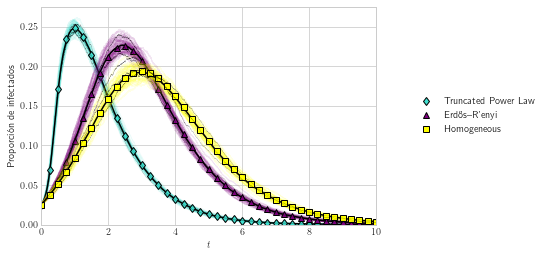

In [9]:
#Powerlaw
process_degree_distribution(N, PkPowLaw, colors[3], PsiPowLaw, DPsiPowLaw, 'd', 'Truncated Power Law', count)

#Poisson
process_degree_distribution(N, PkPoisson, colors[0], PsiPoisson, DPsiPoisson, '^', 'Erd\H{o}s--R\'{e}nyi', count)

#Homogeneous
process_degree_distribution(N, PkHomogeneous, colors[2], PsiHomogeneous, DPsiHomogeneous, 's', 'Homogeneous', count)

plt.xlabel('$t$',fontweight="bold")
plt.ylabel('Proporción de infectados', fontweight="bold")
plt.legend(loc=5,bbox_to_anchor=(1.5,0.5))
plt.axis(xmax=10, xmin=0, ymin=0)
plt.show()

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


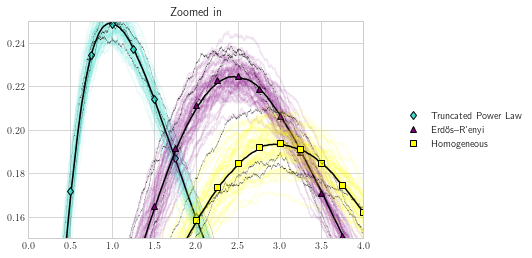

In [8]:
#plt.savefig('fig1p2.pdf')

#Zoom in
#Powerlaw
process_degree_distribution(N, PkPowLaw, colors[3], PsiPowLaw, DPsiPowLaw, 'd', 'Truncated Power Law', count)

#Poisson
process_degree_distribution(N, PkPoisson, colors[0], PsiPoisson, DPsiPoisson, '^', 'Erd\H{o}s--R\'{e}nyi', count)

#Homogeneous
process_degree_distribution(N, PkHomogeneous, colors[2], PsiHomogeneous, DPsiHomogeneous, 's', 'Homogeneous', count)
ax2 = plt.subplot()
plt.axis(xmax=4, xmin=0, ymin=0.15, ymax=0.25) 
plt.legend(loc=5,bbox_to_anchor=(1.5,0.5))

ax2.set_title('Zoomed in',fontweight="bold")
plt.show()